<a href="https://www.kaggle.com/code/gmgoes/notebook20bd4f0fb2?scriptVersionId=134629013" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [ ]:
# Libraries
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
import numpy as np
import random
import os
print('OK');

In [82]:
# Getting the dataset
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv', delimiter=','); # nrows = 284807 (We define how many tuples we want, default = All)
df.dataframeName = 'creditcard.csv';
y = df['Class'];
y = y.to_numpy();
X = df.drop(columns = 'Class');
X = X.to_numpy();
#print(df.head(5))
#vetor = df['Time'].values
#print(len(vetor))
# print(df.head(5));
# print(df.shape);
# print(df.describe());
print('OK');

OK


In [ ]:
# Raj Kumar - Explanation and interpretation of classes
# fraud = df[df['Class'] == 1];
# valid = df[df['Class'] == 0];
# outlierFraction = len(fraud)/float(len(valid));
# print(outlierFraction);
# print('Fraud Cases: {}'.format(len(df[df['Class'] == 1])));
# print('Valid Transactions: {}'.format(len(df[df['Class'] == 0])));
# print("Amount details of the fraudulent transaction");
# fraud.Amount.describe();

### TODO:
   - Do tests with OverSampler
        - 'minority': resample only the minority class; ✅
        - 'not minority': resample all classes but the minority class; ✅
        - 'not majority': resample all classes but the majority class; ✅
        - 'all': resample all classes; ✅
        - 'auto': equivalent to 'not majority'. ✅
   - Do tests with UnderSampler
        - 'majority': resample only the majority class; ✅
        - 'not minority': resample all classes but the minority class; ✅
        - 'not majority': resample all classes but the majority class; ✅
        - 'all': resample all classes; ✅
        - 'auto': equivalent to 'not minority ✅
        
   - Do tests with SMOTE
        - 'minority': resample only the minority class; ✅
        - 'not minority': resample all classes but the minority class; ✅
        - 'not majority': resample all classes but the majority class; ✅
        - 'all': resample all classes; ✅
        - 'auto': equivalent to 'not majority'.✅

In [92]:
# RandomOverSampler - Grows our data to balance the amount of data we have for each class
ros = RandomOverSampler(random_state = 42, sampling_strategy = 'minority');
# ros = RandomOverSampler(random_state = 42, sampling_strategy = 'not minority');
# ros = RandomOverSampler(random_state = 42, sampling_strategy = 'not majority');
# ros = RandomOverSampler(random_state = 42, sampling_strategy = 'all');
X_over, y_over = ros.fit_resample(X, y);
# print(len(X_over));
# print(len(y_over));
freq_class = sorted(Counter(y).items());
freq_classO = sorted(Counter(y_over).items());
print(freq_class);
print(freq_classO);


[(0, 284315), (1, 492)]
[(0, 284315), (1, 284315)]


Minority: Antes tinhamos 284315 Exemplos de Trans. Seguras e 492 de Fraudes e agora temos 284315 Exemplos de Trans. Seguras e 284315 de Fraudes <br>
Not Minority: Antes tinhamos 284315 Exemplos de Trans. Seguras e 492 de Fraudes e agora temos 284315 Exemplos de Trans. Seguras e 492 de Fraudes <br>
Not Majority: Antes tinhamos 284315 Exemplos de Trans. Seguras e 492 de Fraudes e agora temos 284315 Exemplos de Trans. Seguras e 284315 de Fraudes <br>
All: Antes tinhamos 284315 Exemplos de Trans. Seguras e 492 de Fraudes e agora temos 284315 Exemplos de Trans. Seguras e 284315 de Fraudes

In [80]:
# RandomUnderSampler - Shrink our data to balance the amount of data we have for each class
# rus = RandomUnderSampler(random_state = 42, sampling_strategy = 'majority');
# rus = RandomUnderSampler(random_state = 42, sampling_strategy = 'not minority');
# rus = RandomUnderSampler(random_state = 42, sampling_strategy = 'not majority');
rus = RandomUnderSampler(random_state = 42, sampling_strategy = 'all');
X_under, y_under = rus.fit_resample(X, y);
freq_class = sorted(Counter(y).items());
freq_classU = sorted(Counter(y_under).items());
print(freq_class);
print(freq_classU);

[(0, 284315), (1, 492)]
[(0, 492), (1, 492)]


Majority: Antes tinhamos 284315 Exemplos de Trans. Seguras e 492 de Fraudes e agora temos 492 Exemplos de Trans. Seguras e 492 de Fraudes <br>
Not Minority: Antes tinhamos 284315 Exemplos de Trans. Seguras e 492 de Fraudes e agora temos 492 Exemplos de Trans. Seguras e 492 de Fraudes <br>
Not Majority: Antes tinhamos 284315 Exemplos de Trans. Seguras e 492 de Fraudes e agora temos 284315 Exemplos de Trans. Seguras e 492 de Fraudes <br>
All: Antes tinhamos 284315 Exemplos de Trans. Seguras e 492 de Fraudes e agora temos 492 Exemplos de Trans. Seguras e 492 de Fraudes

In [47]:
# SMOTE - Synthetic Minority Over-sampling Technique
sm = SMOTE(random_state = 42, sampling_strategy = 'minority');
# sm = SMOTE(random_state = 42, sampling_strategy = 'not minority');
# sm = SMOTE(random_state = 42, sampling_strategy = 'not majority');
# sm = SMOTE(random_state = 42, sampling_strategy = 'all');
X_smote, y_smote = sm.fit_resample(X, y);
freq_class = sorted(Counter(y).items());
freq_classS = sorted(Counter(y_smote).items());
print(freq_class);
print(freq_classS);

[(0, 284315), (1, 492)]
[(0, 284315), (1, 284315)]


Minority: Antes tinhamos 284315 Exemplos de Trans. Seguras e 492 de Fraudes e agora temos 284315 Exemplos de Trans. Seguras e 284315 de Fraudes <br>
Not Minority: Antes tinhamos 284315 Exemplos de Trans. Seguras e 492 de Fraudes e agora temos 284315 Exemplos de Trans. Seguras e 492 de Fraudes  <br>
Not Majority: Antes tinhamos 284315 Exemplos de Trans. Seguras e 492 de Fraudes e agora temos 284315 Exemplos de Trans. Seguras e 284315 de Fraudes  <br>
All: Antes tinhamos 284315 Exemplos de Trans. Seguras e 492 de Fraudes e agora temos 284315 Exemplos de Trans. Seguras e 284315 de Fraudes

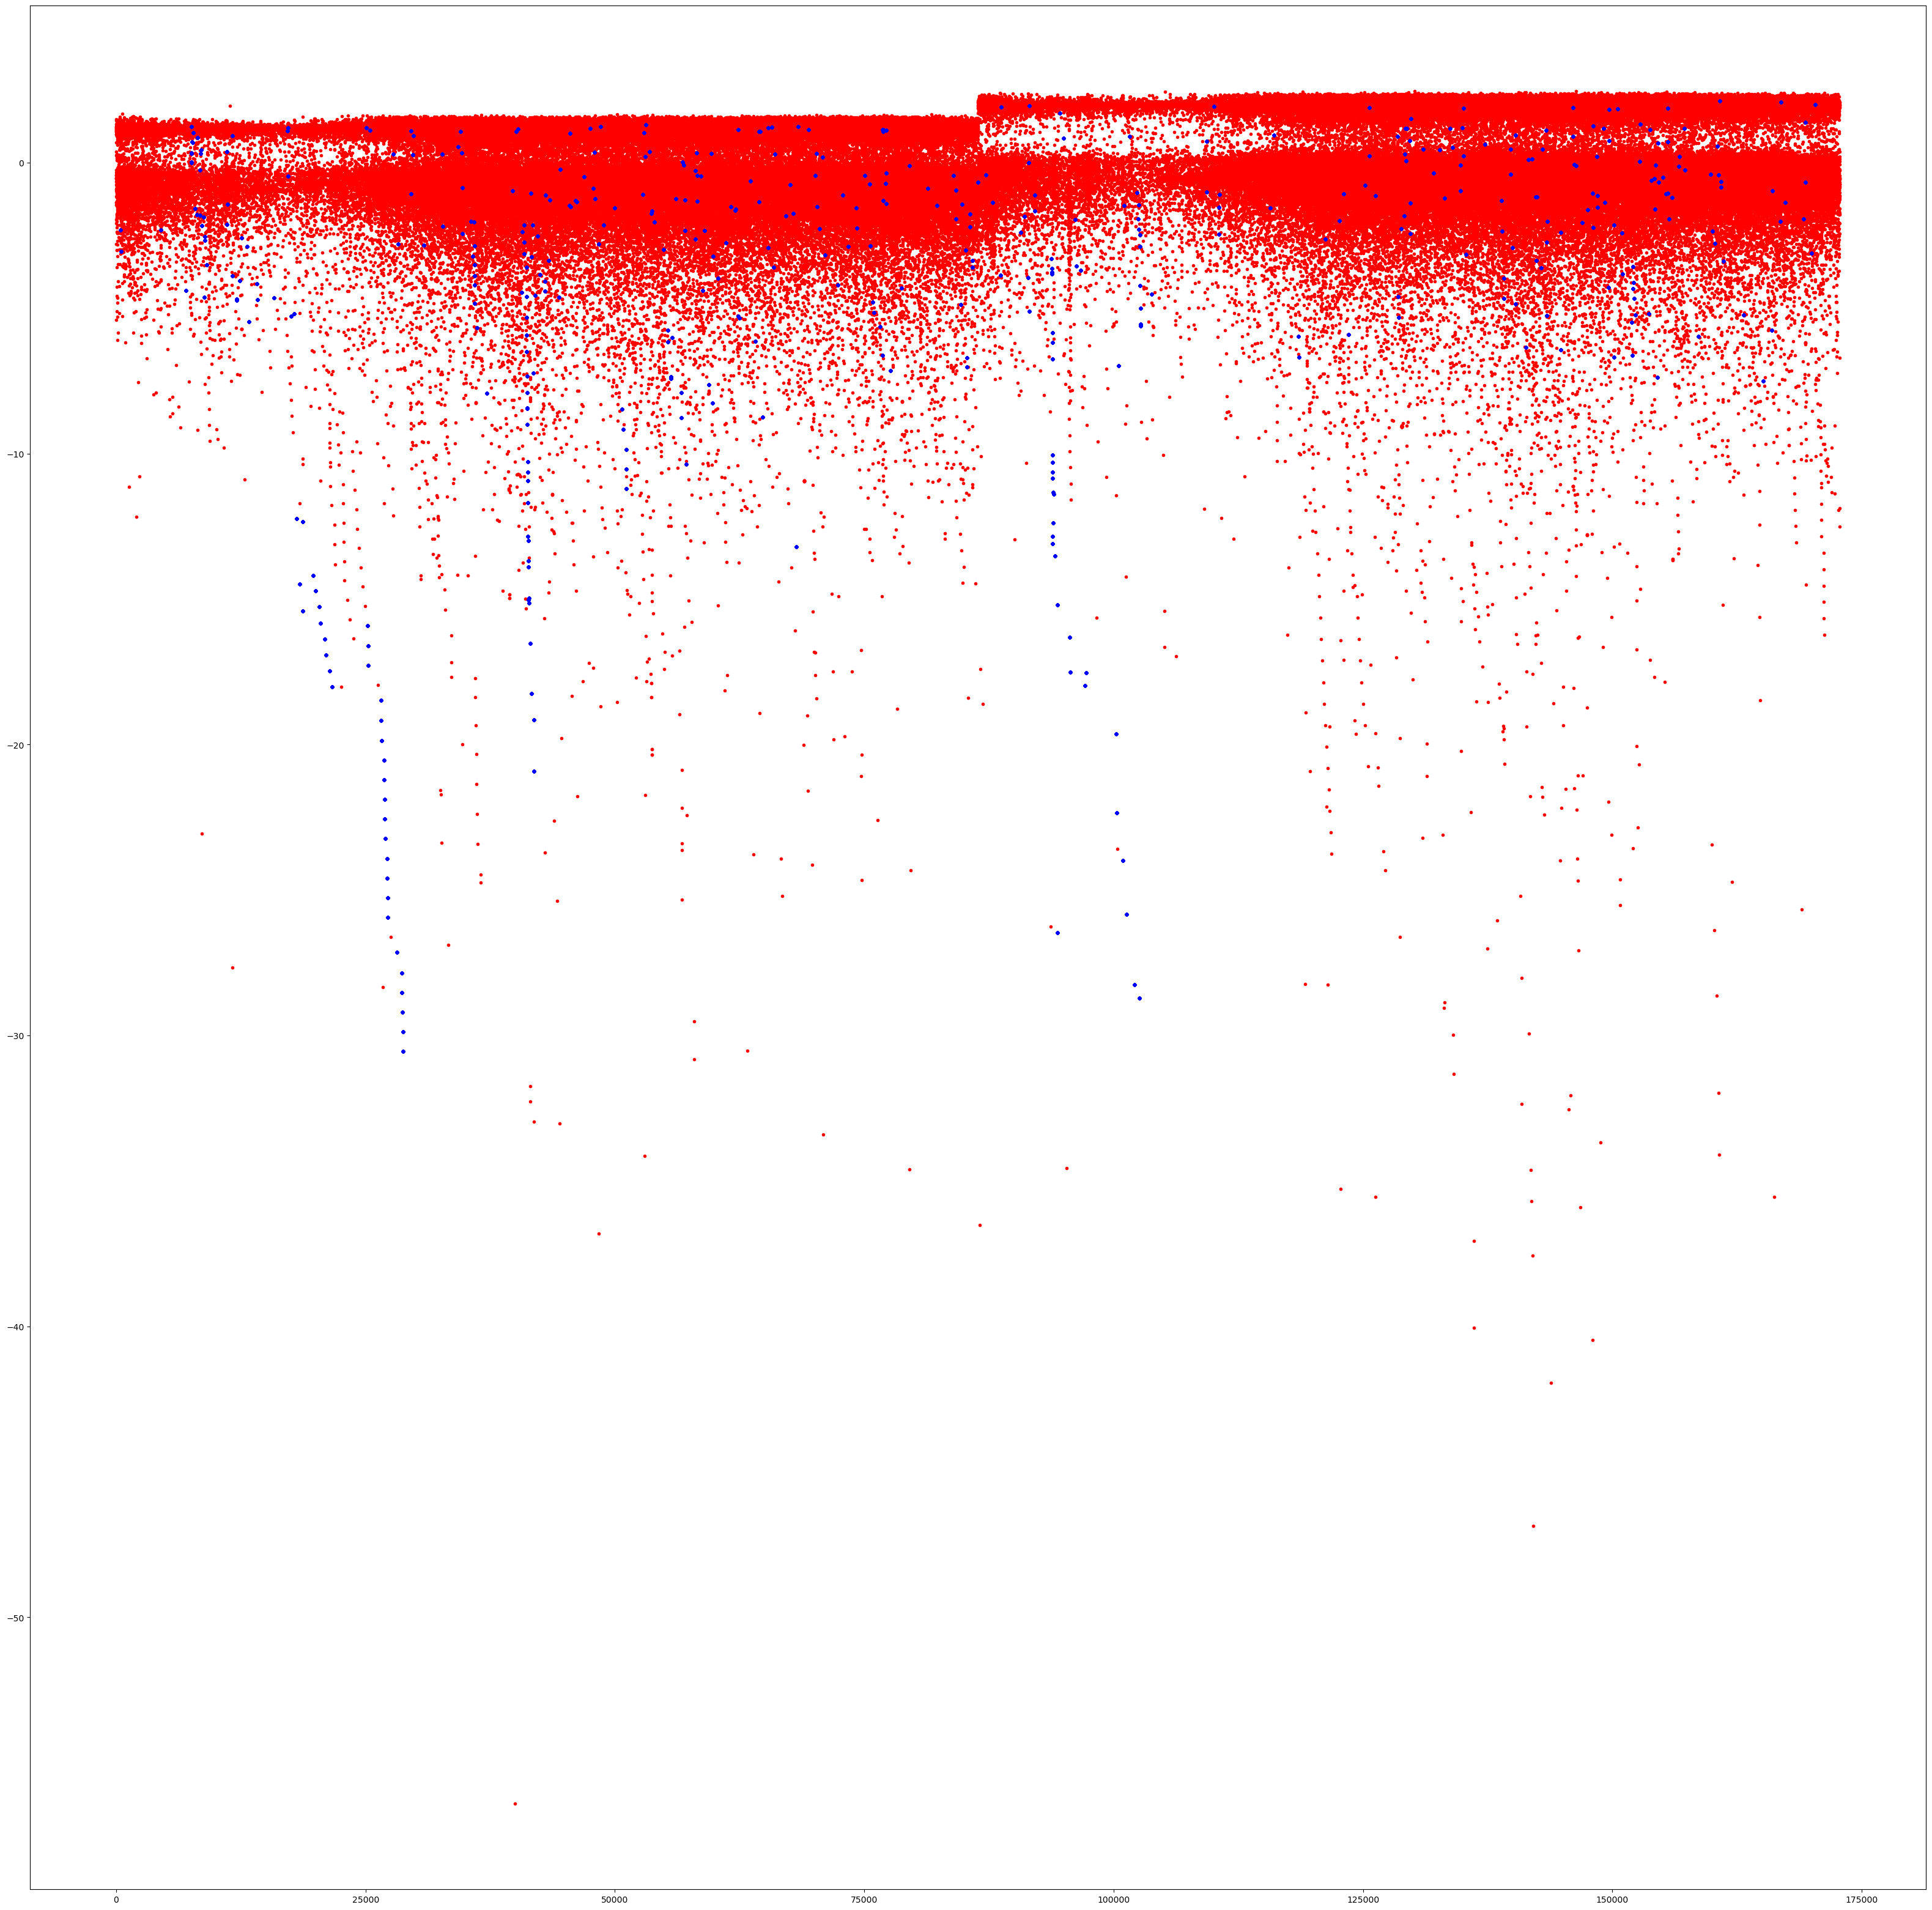

In [86]:
# Plot the data
plt.figure(figsize = (40, 40))
#plt.plot(X_smote[y_smote == 0,0],X_smote[y_smote == 0,1],'.r');
#plt.plot(X_smote[y_smote == 1,0],X_smote[y_smote == 1,1],'.b');
plt.plot(X_over[y_over == 0,0],X_over[y_over == 0,1],'.r');
plt.plot(X_over[y_over == 1,0],X_over[y_over == 1,1],'.b');
#plt.plot(X_under[y_under == 0,0],X_under[y_under == 0,1],'.r');
#plt.plot(X_under[y_under == 1,0],X_under[y_under == 1,1],'.b');
#plt.plot(X[y == 1,0], X[y == 1,1],'dy')
plt.show();

In [ ]:
def aleatory_generator():   # function to get some random data from our already balanced dataset
    aleatory_data = [];
    aleatory_target = [];
    for i in range(500):
        aleatory_position = random.randint(1, len(X_smote));
        aleatory_data.append(X_smote[aleatory_position]);
        aleatory_target.append(y_smote[aleatory_position]);
    return aleatory_data, aleatory_target ;

aleatoryd, aleatoryt = aleatory_generator();
print('OK');

In [69]:
# KNN - Classifier implementing the K-Nearest Neighbors vote.
 
neigh = KNeighborsClassifier(n_neighbors = 3); # using KNN with neighbors = 3
# neigh.fit(X_over, y_over); # With Over
neigh.fit(X_under, y_under); # With Under
# neigh.fit(X_smote, y_smote); # With Smote

#print(neigh.predict(aleatoryd); # what our algorithm is predicting it to be
#print(neigh.predict_proba(aleatoryd); #the probability of being the one he guessed
print(f"{(neigh.score(aleatoryd, aleatoryt)):.1%}")

71.4%


## Resultado dos testes com cada tipo de método de balanceamento:
    - RandomOverSampler
        - Minority = 70.0%
        - Not Minority = 61.2%
        - Not Majority = 70.0%
        - All = 70.0%
        
    - RandomUnderSampler
        - Majority = 71.4%
        - Not Minority = 71.4%
        - Not Majority = 61.2%
        - All = 71.4%
        
    - SMOTE
        - Minority = 98.4%
        - Not Minority = 61.2%
        - Not Majority = 98.4%
        - All = 98.4%

In [ ]:
# TTS (Train Test Split) X_train, X_test, y_train, y_test (Divisão dos dados para treino e para teste)
# X = df.drop(['Class'], axis = 1);
# print(X);
# y = df["Class"];
# print(y);
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, train_size = 0.7); # random_state estático, dados para treino de 70%
#print(len(y_train));

References: <br>
https://www.kaggle.com/code/rajkumarpandey02/ml-credit-card-fraud-detection <br>
https://imbalanced-learn.org/stable/index.html <br>
https://scikit-learn.org/stable/ <br>
https://builtin.com/data-science/train-test-split <br>
https://www.youtube.com/watch?v=kZNkaNATmd8 <br>
https://didatica.tech/o-que-e-e-como-funciona-o-algoritmo-knn/